In [ ]:
# data manipulation
import pandas as pd
import numpy as np

# EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Data preparation
from sklearn.preprocessing import Normalizer, StandardScaler

# Machine Learning
from sklearn.cluster import KMeans

# Cluster evaluation metrics
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Cluster visualization
import plotly.express as px
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [ ]:
# loads data set
df_cc_raw = pd.read_csv('/content/CC GENERAL.csv')

df_cc_raw.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
# checks data set info
df_cc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
# drops the column
df_cc = df_cc_raw.drop('CUST_ID', axis=1)
df_cc.sample()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
1846,86.694598,0.5,0.0,0.0,0.0,465.455995,0.0,0.0,0.0,0.1,1,0,1500.0,543.82992,64.977254,0.0,10


In [ ]:
# creates an empty list
new_cols_names = [] 

# stores the new cols names
for col in df_cc.columns:
    new_cols_names.append(col.lower())

In [ ]:
# renames data set cols
df_cc.columns = new_cols_names

df_cc.sample()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
8412,18.908241,0.272727,126.0,126.0,0.0,0.0,0.090909,0.090909,0.0,0.0,0,1,1000.0,643.427524,81.346722,0.0,11


In [ ]:
# central tendency: mean, median
mean = pd.DataFrame(df_cc.apply(np.mean)).T
median = pd.DataFrame(df_cc.apply(np.median)).T

# distribution: std, min, max, range, skew, kurtosis
std = pd.DataFrame(df_cc.apply(np.std)).T
min_value = pd.DataFrame(df_cc.apply(min)).T
max_value = pd.DataFrame(df_cc.apply(max)).T
range_value = pd.DataFrame(df_cc.apply(lambda x: x.max() - x.min())).T
skewness = pd.DataFrame(df_cc.apply(lambda x: x.skew())).T
kurtosis = pd.DataFrame(df_cc.apply(lambda x: x.kurtosis())).T

# concatenates
summary_stats = pd.concat([min_value, max_value, range_value, mean, median, std, skewness, kurtosis]).T.reset_index()
summary_stats.columns = ['attributes','min','max','range','mean','median','std','skewness','kurtosis']

In [ ]:
# checks the operations
round(summary_stats, 4)

,attributes,min,max,range,mean,median,std,skewness,kurtosis
0,balance,0.0000,19043.1386,19043.1386,1564.4748,873.3852,2081.4156,2.3934,7.6748
1,balance_frequency,0.0000,1.0000,1.0000,0.8773,1.0000,0.2369,-2.0233,3.0924
2,purchases,0.0000,49039.5700,49039.5700,1003.2048,361.2800,2136.5154,8.1443,111.3888
3,oneoff_purchases,0.0000,40761.2500,40761.2500,592.4374,38.0000,1659.7952,10.0451,164.1876
4,installments_purchases,0.0000,22500.0000,22500.0000,411.0676,89.0000,904.2876,7.2991,96.5752
5,cash_advance,0.0000,47137.2118,47137.2118,978.8711,0.0000,2097.0467,5.1666,52.8994
6,purchases_frequency,0.0000,1.0000,1.0000,0.4904,0.5000,0.4013,0.0602,-1.6386
7,oneoff_purchases_frequency,0.0000,1.0000,1.0000,0.2025,0.0833,0.2983,1.5356,1.1618
8,purchases_installments_frequency,0.0000,1.0000,1.0000,0.3644,0.1667,0.3974,0.5092,-1.3986
9,cash_advance_frequency,0.0000,1.5000,1.5000,0.1351,0.0000,0.2001,1.8287,3.3347


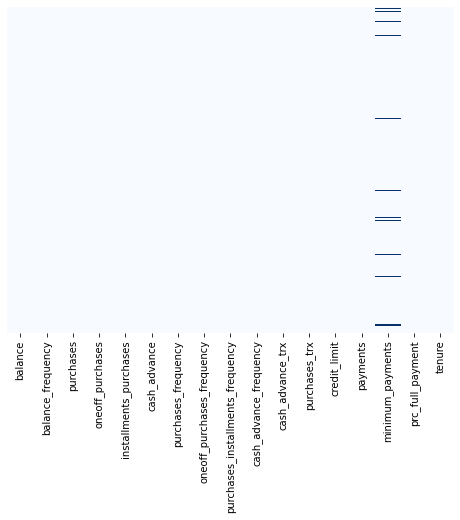

In [ ]:
# sets plot size
plt.figure(figsize=(8,6))

# let's see if we have any missing data
sns.heatmap(df_cc.isnull(), yticklabels=False, cbar=False, cmap='Blues')

# displays the plot
plt.show()

In [ ]:
# checks how many missin data we have
df_cc.isna().sum()

balance                               0
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                          0
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    313
prc_full_payment                      0
tenure                                0
dtype: int64

In [ ]:
# Fill up the missing elements with mean of the 'minimum_payments' 
df_cc.loc[(df_cc['minimum_payments'].isnull() == True), 'minimum_payments'] = df_cc['minimum_payments'].mean()

# Fill up the missing elements with mean of the 'CREDIT_LIMIT' 
df_cc.loc[(df_cc['credit_limit'].isnull() == True), 'credit_limit'] = df_cc['credit_limit'].mean()

In [ ]:
# checks how many missin data we have
df_cc.isna().sum()

balance                             0
balance_frequency                   0
purchases                           0
oneoff_purchases                    0
installments_purchases              0
cash_advance                        0
purchases_frequency                 0
oneoff_purchases_frequency          0
purchases_installments_frequency    0
cash_advance_frequency              0
cash_advance_trx                    0
purchases_trx                       0
credit_limit                        0
payments                            0
minimum_payments                    0
prc_full_payment                    0
tenure                              0
dtype: int64

In [ ]:
# central tendency: mean, median
mean = pd.DataFrame(df_cc.apply(np.mean)).T
median = pd.DataFrame(df_cc.apply(np.median)).T

# distribution: std, min, max, range, skew, kurtosis
std = pd.DataFrame(df_cc.apply(np.std)).T
min_value = pd.DataFrame(df_cc.apply(min)).T
max_value = pd.DataFrame(df_cc.apply(max)).T
range_value = pd.DataFrame(df_cc.apply(lambda x: x.max() - x.min())).T
skewness = pd.DataFrame(df_cc.apply(lambda x: x.skew())).T
kurtosis = pd.DataFrame(df_cc.apply(lambda x: x.kurtosis())).T

# concatenates
summary_stats = pd.concat([min_value, max_value, range_value, mean, median, std, skewness, kurtosis]).T.reset_index()
summary_stats.columns = ['attributes','min','max','range','mean','median','std','skewness','kurtosis']

In [ ]:
# classifies skwewness
summary_stats['skwewness_class'] = summary_stats['skewness'].apply(lambda x: 
                                                                   'nearly symmetric' if (((x > 0) & (x < 0.5)) | ((x < 0) & (x > -0.5))) 
                                                                   else 'moderately skewed' if (((x > 0.5) & (x < 1.0)) | ((x < -0.5) & (x > -1.0))) 
                                                                   else 'highly skewed')

# classifies kurtosis
summary_stats['kurtosis_class'] = summary_stats['kurtosis'].apply(lambda x:
                                                                 'heavy tails' if (x > 0) 
                                                                 else 'light tails')

In [ ]:
# checks operations
round(summary_stats, 4)

,attributes,min,max,range,mean,median,std,skewness,kurtosis,skwewness_class,kurtosis_class
0,balance,0.0000,19043.1386,19043.1386,1564.4748,873.3852,2081.4156,2.3934,7.6748,highly skewed,heavy tails
1,balance_frequency,0.0000,1.0000,1.0000,0.8773,1.0000,0.2369,-2.0233,3.0924,highly skewed,heavy tails
2,purchases,0.0000,49039.5700,49039.5700,1003.2048,361.2800,2136.5154,8.1443,111.3888,highly skewed,heavy tails
3,oneoff_purchases,0.0000,40761.2500,40761.2500,592.4374,38.0000,1659.7952,10.0451,164.1876,highly skewed,heavy tails
4,installments_purchases,0.0000,22500.0000,22500.0000,411.0676,89.0000,904.2876,7.2991,96.5752,highly skewed,heavy tails
5,cash_advance,0.0000,47137.2118,47137.2118,978.8711,0.0000,2097.0467,5.1666,52.8994,highly skewed,heavy tails
6,purchases_frequency,0.0000,1.0000,1.0000,0.4904,0.5000,0.4013,0.0602,-1.6386,nearly symmetric,light tails
7,oneoff_purchases_frequency,0.0000,1.0000,1.0000,0.2025,0.0833,0.2983,1.5356,1.1618,highly skewed,heavy tails
8,purchases_installments_frequency,0.0000,1.0000,1.0000,0.3644,0.1667,0.3974,0.5092,-1.3986,moderately skewed,light tails
9,cash_advance_frequency,0.0000,1.5000,1.5000,0.1351,0.0000,0.2001,1.8287,3.3347,highly skewed,heavy tails


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

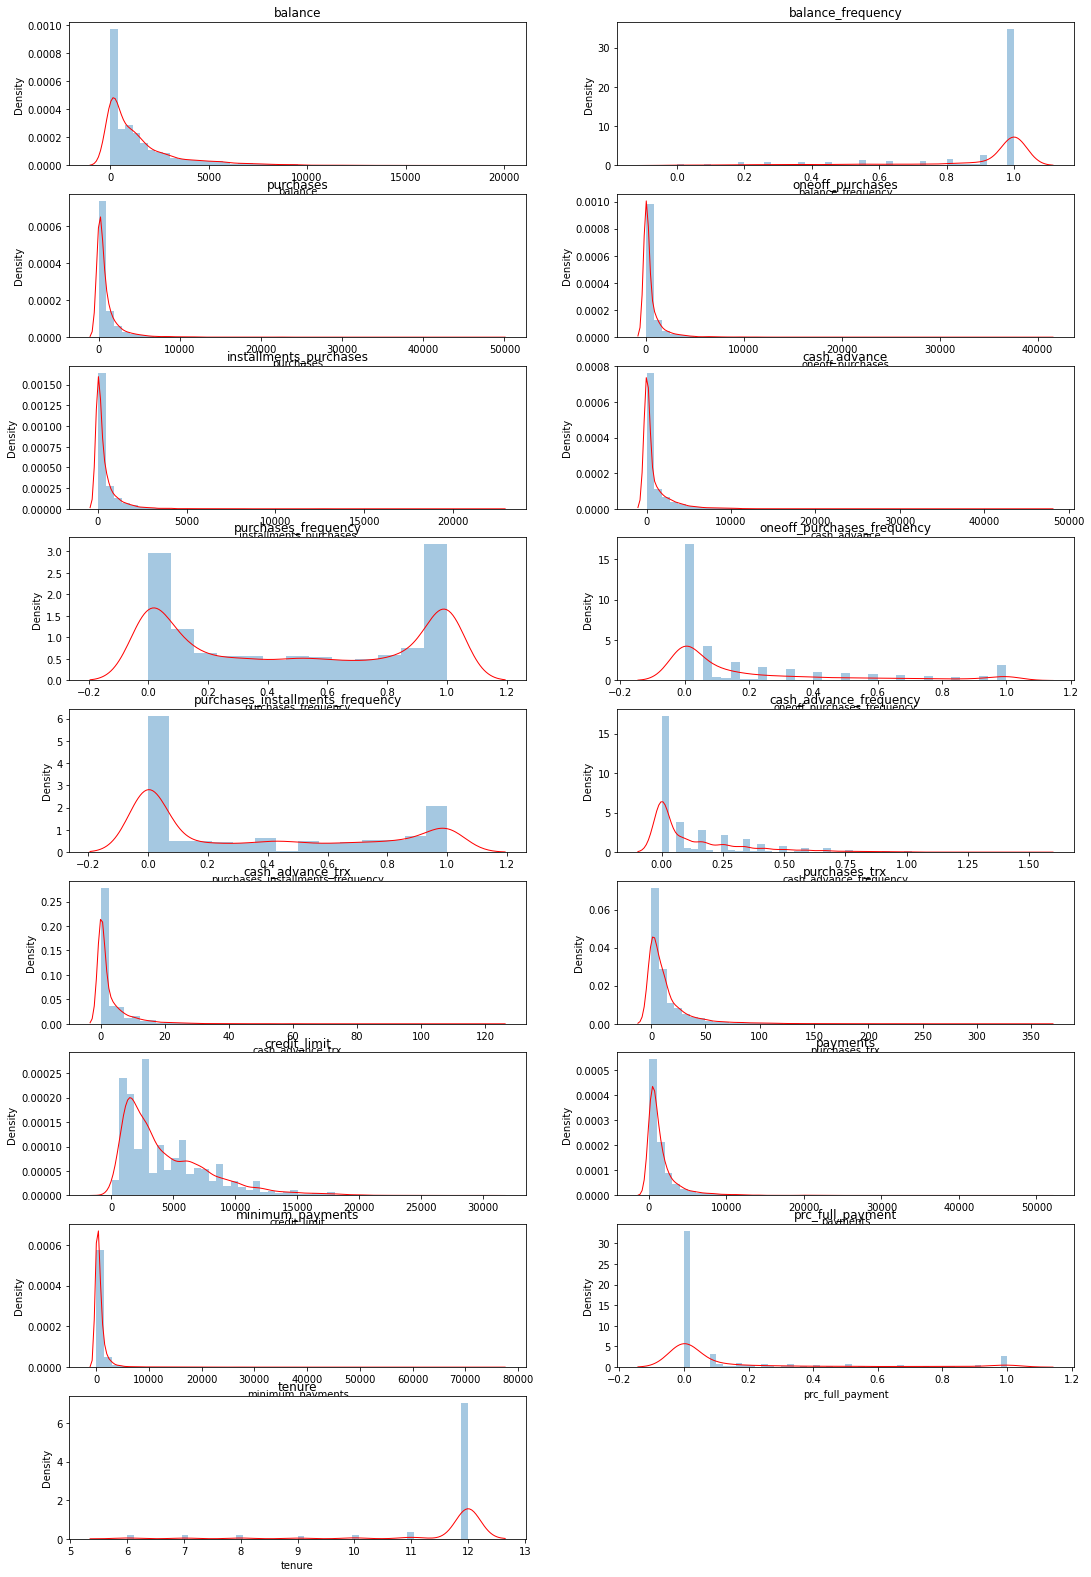

In [ ]:
# sets the plot size
plt.figure(figsize=(18, 50))

# plots a distribution for each feature 
for i in range(len(df_cc.columns)):
    plt.subplot(16, 2, i+1)
    sns.distplot(df_cc[df_cc.columns[i]],
                 kde_kws={'color':'red', 'lw':1, 'label':'KDE'})
    plt.title(df_cc.columns[i])

In [ ]:
# adjusts the layout    
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

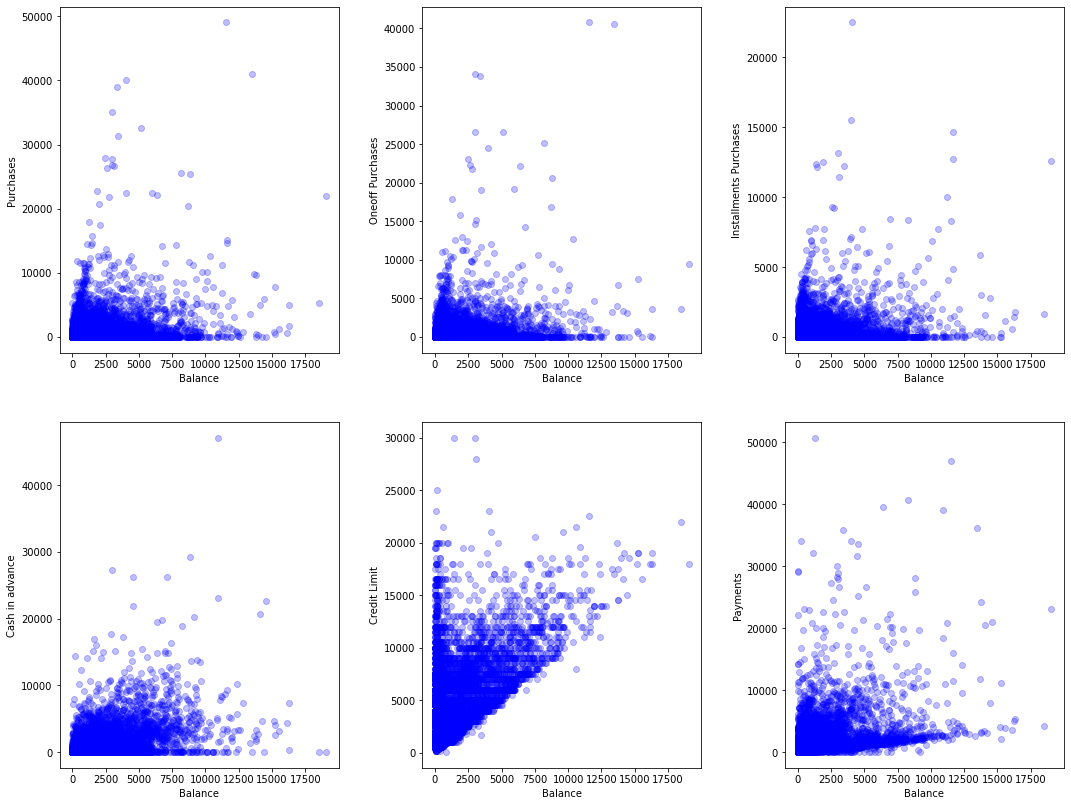

In [ ]:
# sets figure size
plt.figure(figsize=(18, 14))

# plots a scatter plot
plt.subplot(2,3,1)
plt.scatter(df_cc['balance'], df_cc['purchases'], color='blue', alpha=0.25)
plt.xlabel('Balance')
plt.ylabel('Purchases')


# plots a scatter plot
plt.subplot(2,3,2)
plt.scatter(df_cc['balance'], df_cc['oneoff_purchases'], color='blue', alpha=0.25)
plt.xlabel('Balance')
plt.ylabel('Oneoff Purchases')


# plots a scatter plot
plt.subplot(2,3,3)
plt.scatter(df_cc['balance'], df_cc['installments_purchases'], color='blue', alpha=0.25)
plt.xlabel('Balance')
plt.ylabel('Installments Purchases')

# plots a scatter plot
plt.subplot(2,3,4)
plt.scatter(df_cc['balance'], df_cc['cash_advance'], color='blue', alpha=0.25)
plt.xlabel('Balance')
plt.ylabel('Cash in advance')

# plots a scatter plot
plt.subplot(2,3,5)
plt.scatter(df_cc['balance'], df_cc['credit_limit'], color='blue', alpha=0.25)
plt.xlabel('Balance')
plt.ylabel('Credit Limit')


# plots a scatter plot
plt.subplot(2,3,6)
plt.scatter(df_cc['balance'], df_cc['payments'], color='blue', alpha=0.25)
plt.xlabel('Balance')
plt.ylabel('Payments')

# prevents scientific notation on axis
plt.ticklabel_format(useOffset=False, style='plain')

# adjusts spaces between plots
plt.subplots_adjust(hspace = 0.2)
plt.subplots_adjust(wspace = 0.3)

# displays the plot
plt.show()

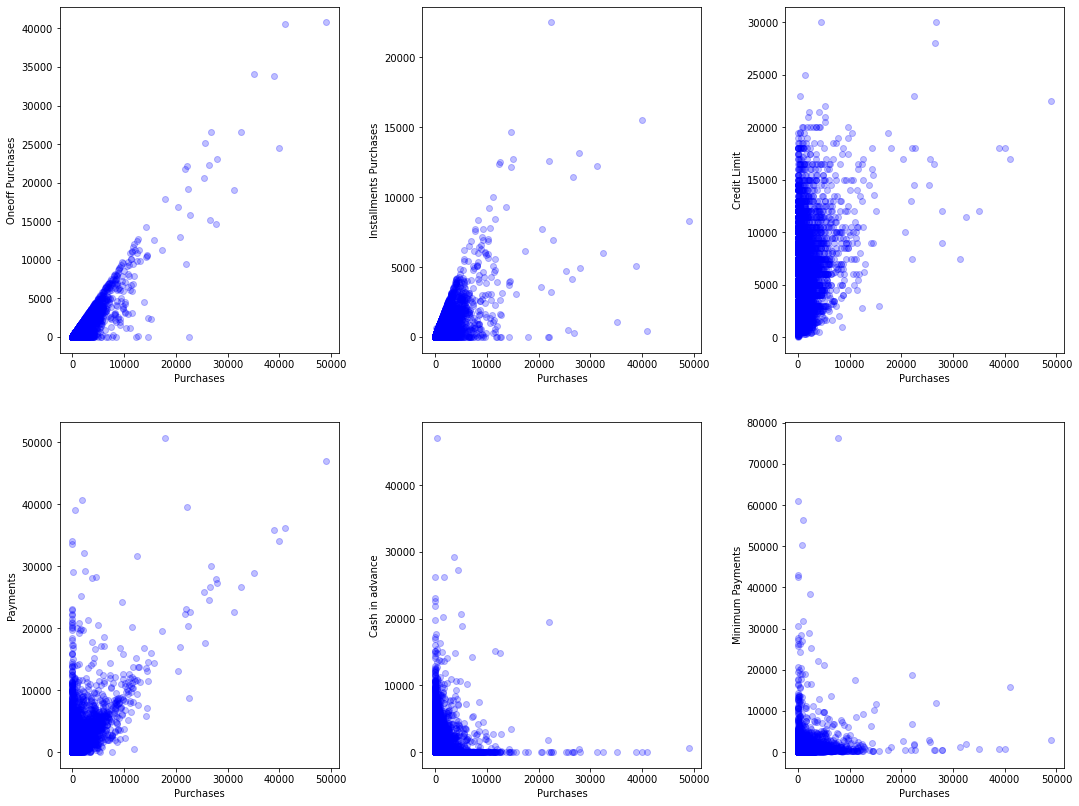

In [ ]:
# sets figure size
plt.figure(figsize=(18, 14))

# plots a scatter plot
plt.subplot(2,3,1)
plt.scatter(df_cc['purchases'], df_cc['oneoff_purchases'], color='blue', alpha=0.25)
plt.xlabel('Purchases')
plt.ylabel('Oneoff Purchases')


# plots a scatter plot
plt.subplot(2,3,2)
plt.scatter(df_cc['purchases'], df_cc['installments_purchases'], color='blue', alpha=0.25)
plt.xlabel('Purchases')
plt.ylabel('Installments Purchases')


# plots a scatter plot
plt.subplot(2,3,3)
plt.scatter(df_cc['purchases'], df_cc['credit_limit'], color='blue', alpha=0.25)
plt.xlabel('Purchases')
plt.ylabel('Credit Limit')


# plots a scatter plot
plt.subplot(2,3,4)
plt.scatter(df_cc['purchases'], df_cc['payments'], color='blue', alpha=0.25)
plt.xlabel('Purchases')
plt.ylabel('Payments')


# plots a scatter plot
plt.subplot(2,3,5)
plt.scatter(df_cc['purchases'], df_cc['cash_advance'], color='blue', alpha=0.25)
plt.xlabel('Purchases')
plt.ylabel('Cash in advance')


# plots a scatter plot
plt.subplot(2,3,6)
plt.scatter(df_cc['purchases'], df_cc['minimum_payments'], color='blue', alpha=0.25)
plt.xlabel('Purchases')
plt.ylabel('Minimum Payments')

# prevents scientific notation on axis
plt.ticklabel_format(useOffset=False, style='plain')

# adjusts spaces between plots
plt.subplots_adjust(hspace = 0.2)
plt.subplots_adjust(wspace = 0.3)

# displays the plot
plt.show()

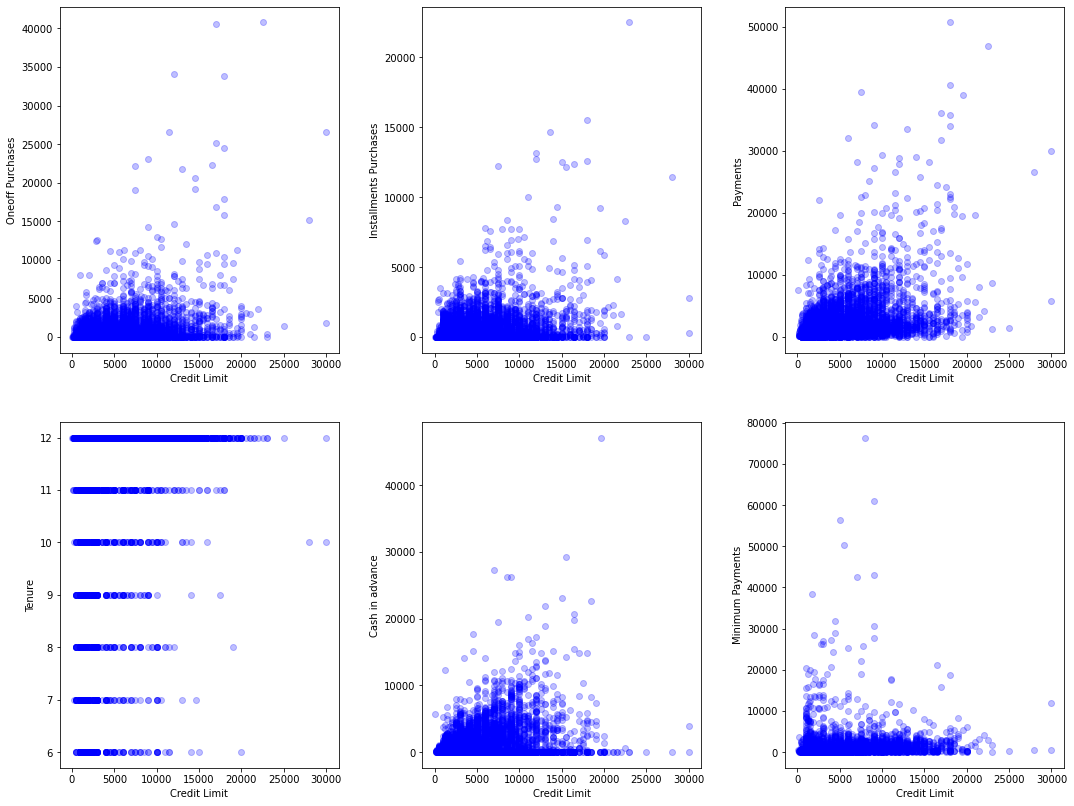

In [ ]:
# sets figure size
plt.figure(figsize=(18, 14))

# plots a scatter plot
plt.subplot(2,3,1)
plt.scatter(df_cc['credit_limit'], df_cc['oneoff_purchases'], color='blue', alpha=0.25)
plt.xlabel('Credit Limit')
plt.ylabel('Oneoff Purchases')


# plots a scatter plot
plt.subplot(2,3,2)
plt.scatter(df_cc['credit_limit'], df_cc['installments_purchases'], color='blue', alpha=0.25)
plt.xlabel('Credit Limit')
plt.ylabel('Installments Purchases')


# plots a scatter plot
plt.subplot(2,3,3)
plt.scatter(df_cc['credit_limit'], df_cc['payments'], color='blue', alpha=0.25)
plt.xlabel('Credit Limit')
plt.ylabel('Payments')


# plots a scatter plot
plt.subplot(2,3,4)
plt.scatter(df_cc['credit_limit'], df_cc['tenure'], color='blue', alpha=0.25)
plt.xlabel('Credit Limit')
plt.ylabel('Tenure')


# plots a scatter plot
plt.subplot(2,3,5)
plt.scatter(df_cc['credit_limit'], df_cc['cash_advance'], color='blue', alpha=0.25)
plt.xlabel('Credit Limit')
plt.ylabel('Cash in advance')


# plots a scatter plot
plt.subplot(2,3,6)
plt.scatter(df_cc['credit_limit'], df_cc['minimum_payments'], color='blue', alpha=0.25)
plt.xlabel('Credit Limit')
plt.ylabel('Minimum Payments')

# prevents scientific notation on axis
plt.ticklabel_format(useOffset=False, style='plain')

# adjusts spaces between plots
plt.subplots_adjust(hspace = 0.2)
plt.subplots_adjust(wspace = 0.3)

# displays the plot
plt.show()

<ipython-input-23-64c06871780e>:11: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(correlation, dtype=np.bool))


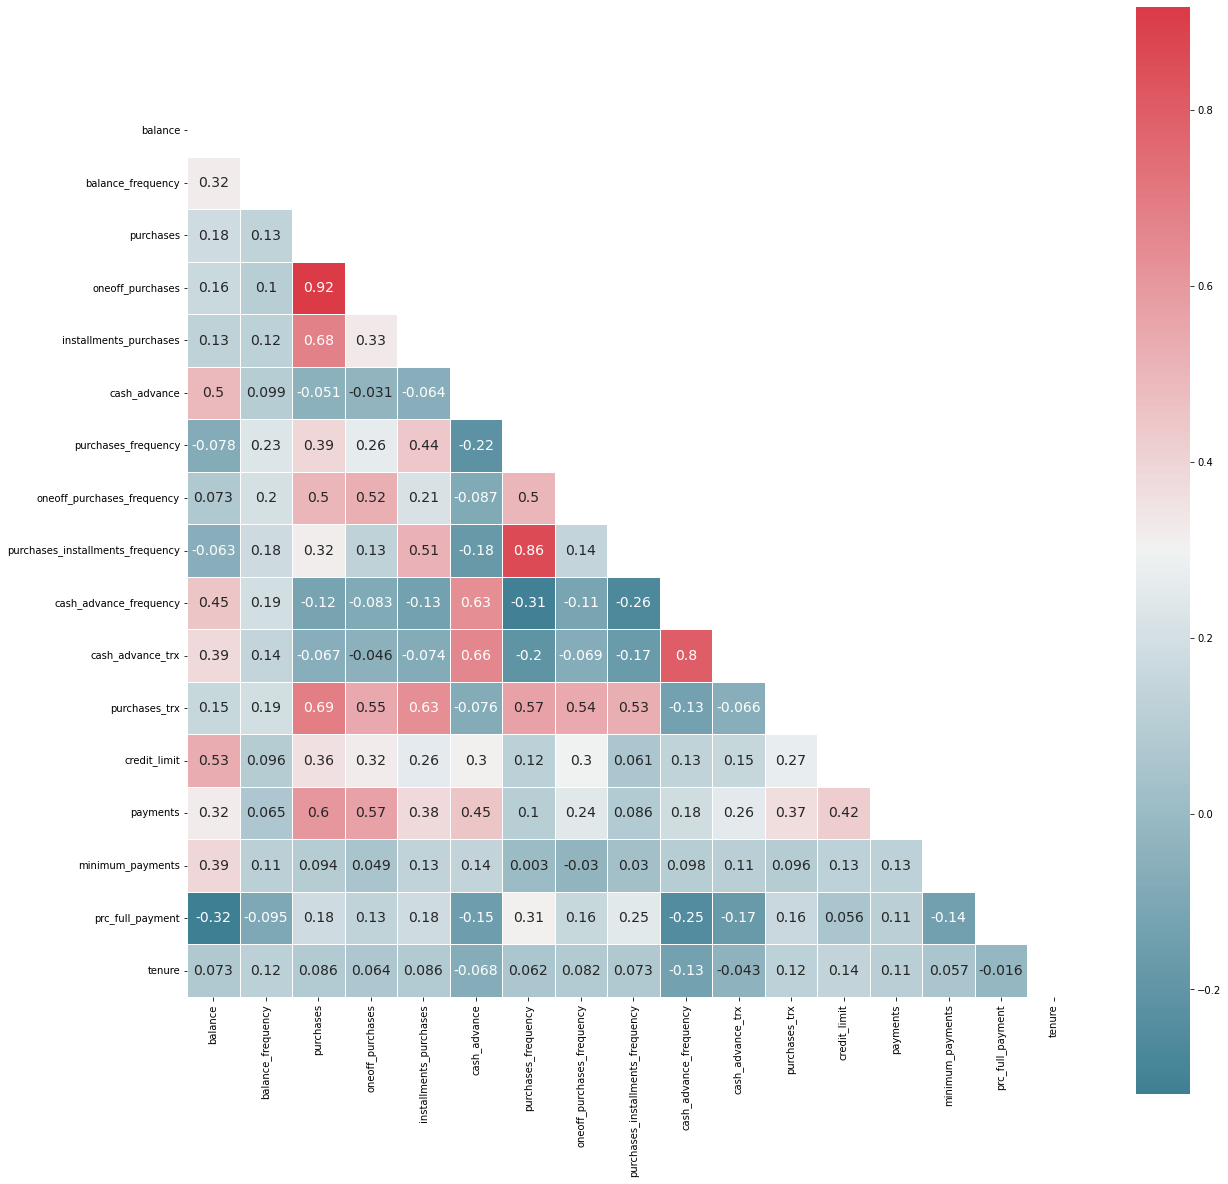

In [ ]:
# calculates the correlations
correlation = df_cc.corr(method='pearson')

# uses the variable ax for single a Axes
fig, ax = plt.subplots()

# sets the figure size in inches
ax.figure.set_size_inches(20, 20)

# generates a mask for the upper triangle
mask = np.triu(np.ones_like(correlation, dtype=np.bool))

# generates a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# plots the heatmap
sns.heatmap(correlation, cmap=cmap, mask=mask, square=True, linewidths=.5, 
            annot=True, annot_kws={'size':14})

# displays the plot
plt.show()

In [ ]:
# normalizes data
df_cc_normalized = Normalizer().fit_transform(df_cc.values)
df_cc_normalized

array([[3.93529208e-02, 7.87219116e-04, 9.17897286e-02, ...,
        1.34230246e-01, 0.00000000e+00, 1.15458778e-02],
       [2.93875725e-01, 8.34231054e-05, 0.00000000e+00, ...,
        9.84037362e-02, 2.03922922e-05, 1.10118488e-03],
       [3.10797802e-01, 1.24560826e-04, 9.63066935e-02, ...,
        7.81351110e-02, 0.00000000e+00, 1.49472991e-03],
       ...,
       [2.27729209e-02, 8.11047126e-04, 1.40538302e-01, ...,
        8.02142497e-02, 2.43314235e-04, 5.83954164e-03],
       [2.65239400e-02, 1.64244246e-03, 0.00000000e+00, ...,
        1.09890537e-01, 4.92732934e-04, 1.18255904e-02],
       [1.86405379e-01, 3.33425336e-04, 5.46775599e-01, ...,
        4.41566401e-02, 0.00000000e+00, 3.00082652e-03]])

In [ ]:
SEED=42
# accumulator for scores
wcss_scores = []

# sets the number of turns
range_values = range(1,20)

for value in range_values:
    # forces kmeans to run 10 times and return the same value
    kmeans = KMeans(n_clusters=value, n_init=10, max_iter=300, random_state=SEED)
    
    # predicts the labels
    kmeans.fit_predict(df_cc_normalized)
    
    # stores the current inertia
    wcss_scores.append(kmeans.inertia_)

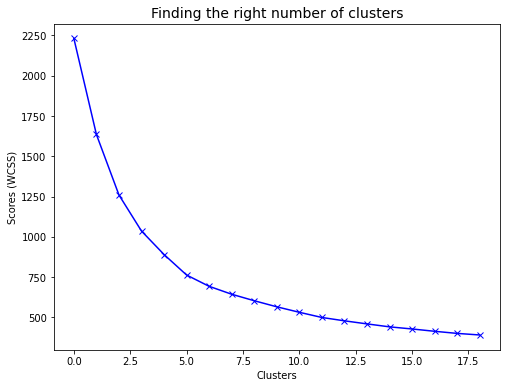

In [ ]:
# sets the figure size
plt.figure(figsize=(8,6))

# plots the wcss scores
plt.plot(wcss_scores, 'bx-')

# sets the plot features
plt.title('Finding the right number of clusters', fontsize=14)
plt.xlabel('Clusters')
plt.ylabel('Scores (WCSS)')

# displays the plot
plt.show()

In [ ]:
def get_clustering_scores(n_clusters, dataset):
    # instantiates the model and predicts the labels
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300, random_state=42)
    labels = kmeans.fit_predict(dataset)
    
    # calculates the scores
    silhouette = silhouette_score(dataset, labels, metric='euclidean')
    davies_bouldin = davies_bouldin_score(dataset, labels)
    calinski_harabasz = calinski_harabasz_score(dataset, labels)
    
    return silhouette, davies_bouldin, calinski_harabasz

In [ ]:
# creates an accumulator for each metric
s_scores = []
db_scores = []
calinski_scores = []

# sets the number of turns
range_values = range(3,20)

for value in range_values:
    # calculates KMeans and get the scores
    s, db, cal = get_clustering_scores(value, df_cc_normalized)
    
    # stores the metrics
    s_scores.append(s)
    db_scores.append(db)
    calinski_scores.append(cal)

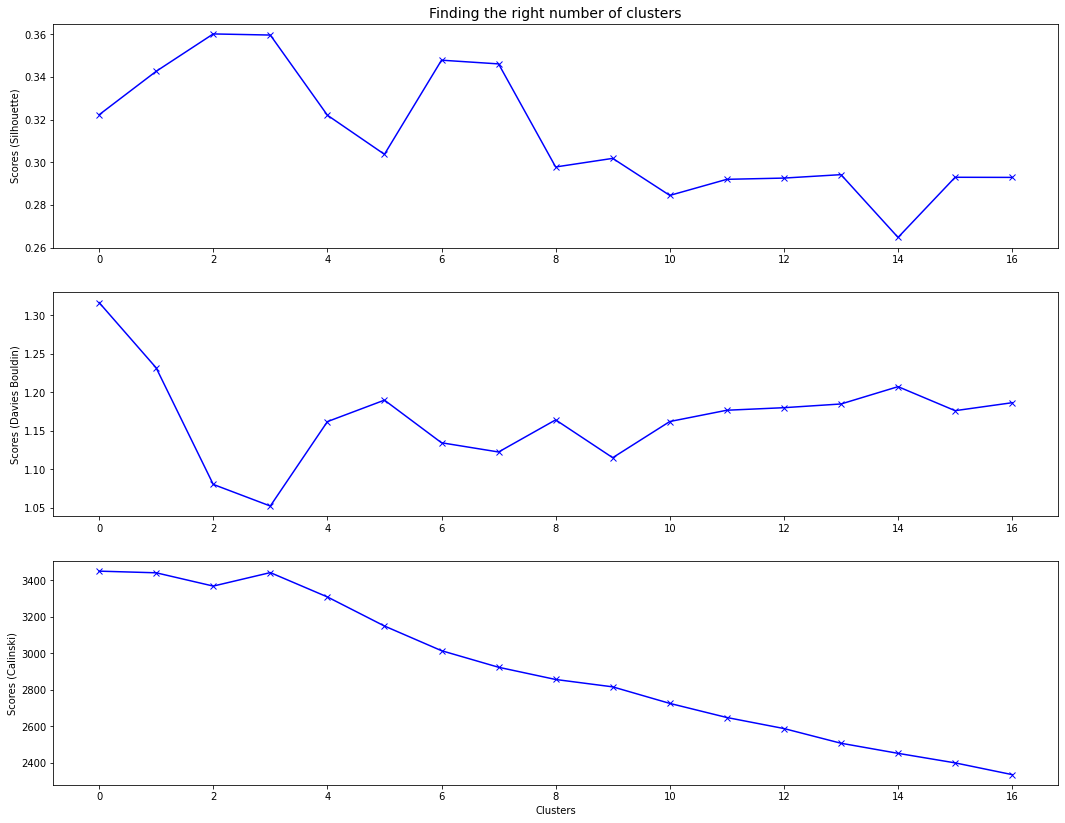

In [ ]:
# sets the figure size
plt.figure(figsize=(18,14))

# plots the wcss scores
plt.subplot(3,1,1)
plt.plot(s_scores, 'bx-')

# sets the plot features
plt.title('Finding the right number of clusters', fontsize=14)
plt.ylabel('Scores (Silhouette)')


# plots the wcss scores
plt.subplot(3,1,2)
plt.plot(db_scores, 'bx-')

# sets the plot features
plt.ylabel('Scores (Davies Bouldin)')


# plots the wcss scores
plt.subplot(3,1,3)
plt.plot(calinski_scores, 'bx-')

# sets the plot features
plt.xlabel('Clusters')
plt.ylabel('Scores (Calinski)')

# displays the plot
plt.show()

In [ ]:
def calculate_clusters_stability(n_sets, n_clusters, dataset):
    sets = np.array_split(dataset, n_sets)

    # creates an accumulator for each metric
    s_scores = []
    db_scores = []
    calinski_scores = []
    
    # calculates the scores and store in their respective list
    for element in sets:
        s, dbs, calinski = get_clustering_scores(n_clusters, element)
            
        s_scores.append(s)
        db_scores.append(dbs)
        calinski_scores.append(calinski)
        
    print(f'Standard deviation for {n_clusters} clusters:\nSilouette: {np.std(s_scores)}\nDavies Bouldin: {np.std(db_scores)}\nCalinski Harabasz: {np.std(calinski_scores)}\n')

In [ ]:
# sets the number os splits for the data
N_SETS = 20
# sets the number of clusters
N_CLUSTERS = 3

# calculates the standard deviation for each score
calculate_clusters_stability(N_SETS, N_CLUSTERS, df_cc_normalized)

Standard deviation for 3 clusters:
Silouette: 0.021269185117699936
Davies Bouldin: 0.0580955289492193
Calinski Harabasz: 13.77776638362324



In [ ]:
# sets the number of clusters
N_CLUSTERS = 5

# calculates the standard deviation for each score
calculate_clusters_stability(N_SETS, N_CLUSTERS, df_cc_normalized)

Standard deviation for 5 clusters:
Silouette: 0.019016671838793103
Davies Bouldin: 0.049434153988233934
Calinski Harabasz: 9.631315317994996



In [ ]:
# sets the number of clusters
N_CLUSTERS = 7

# calculates the standard deviation for each score
calculate_clusters_stability(N_SETS, N_CLUSTERS, df_cc_normalized)

Standard deviation for 7 clusters:
Silouette: 0.025084557243960564
Davies Bouldin: 0.061673033284289476
Calinski Harabasz: 10.308139101239782



In [ ]:
# instantiates cluster algorithm
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300, random_state=SEED)

# finds the clusters
labels = kmeans.fit_predict(df_cc_normalized)

In [ ]:
# sets the number of clusters
N_CLUSTERS = 5

# calculates KMeans and get the scores
s, db, cal = get_clustering_scores(N_CLUSTERS, df_cc_normalized)
print(f'Silouette: {s}\nDavies Bouldin: {db}\nCalinski Harabasz: {cal}\n')

Silouette: 0.3601880710869461
Davies Bouldin: 1.0803963521726379
Calinski Harabasz: 3367.790384261609



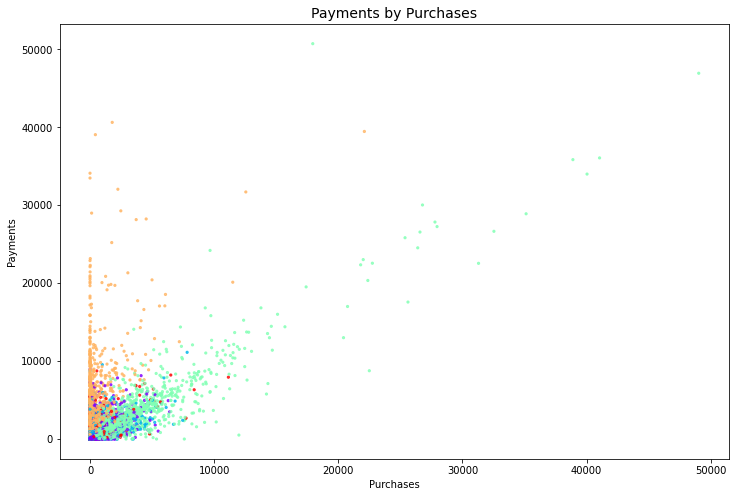

In [ ]:
# sets the plot size
plt.figure(figsize=(12,8))

# plots a scatter plot to view the clusters
plt.scatter(x=df_cc['purchases'], y=df_cc['payments'], c=labels, s=5, cmap='rainbow', alpha=0.75)

# sets the plot features
plt.xlabel('Purchases')
plt.ylabel('Payments')
plt.title("Payments by Purchases", fontsize=14)

# displays the plot
plt.show()

In [ ]:
# creates a column with respective labels
df_cc['cluster'] = labels

In [ ]:
# plots a 3D plot for better cluster viz
fig = px.scatter_3d(df_cc, x='purchases', y='payments', z='credit_limit',
              color='cluster', opacity=0.5)

# displays the plot
fig.show()

In [ ]:
# Obtain the principal components 
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(df_cc_normalized)
principal_comp

array([[-0.31737384, -0.04891545],
       [ 0.32147936, -0.15030301],
       [-0.20679333, -0.18526159],
       ...,
       [-0.3885402 , -0.06594847],
       [-0.33084461, -0.18391082],
       [-0.09490054,  0.30519518]])

In [ ]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-0.317374,-0.048915
1,0.321479,-0.150303
2,-0.206793,-0.185262
3,-0.270623,-0.123003
4,0.140257,-0.088374


In [ ]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-0.317374,-0.048915,0
1,0.321479,-0.150303,3
2,-0.206793,-0.185262,0
3,-0.270623,-0.123003,0
4,0.140257,-0.088374,1


In [ ]:
ykmeans = KMeans(5)
y_kmeans = ykmeans.fit_predict(pca_df)
labels = ykmeans.labels_
y_kmeans

array([2, 1, 2, ..., 2, 2, 3], dtype=int32)

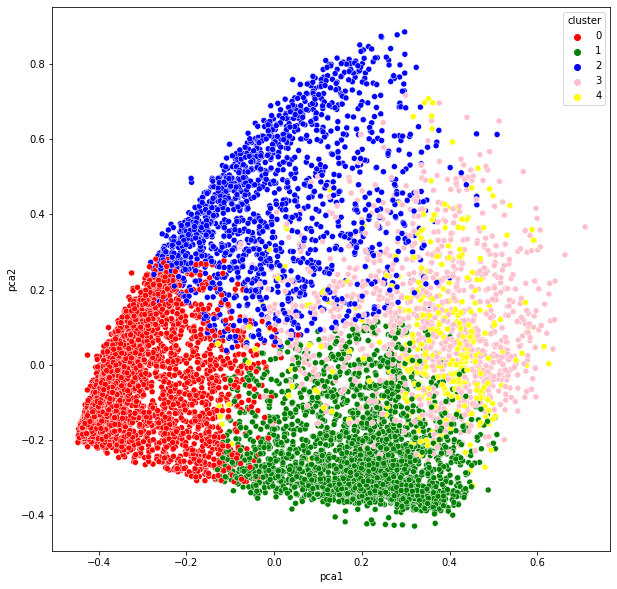

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow'])
plt.show()

In [ ]:
# instantiates TSNE
model = TSNE(n_components=2, perplexity=45, random_state=SEED, n_jobs=-1)

# fits TSNE to data
df_embedded = model.fit_transform(df_cc_normalized)

# joins transformation with labels
df_tsne = pd.concat([pd.DataFrame(df_embedded), pd.DataFrame(labels)], axis=1)

# renames columns
df_tsne.columns = ['t1','t2','labels']

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



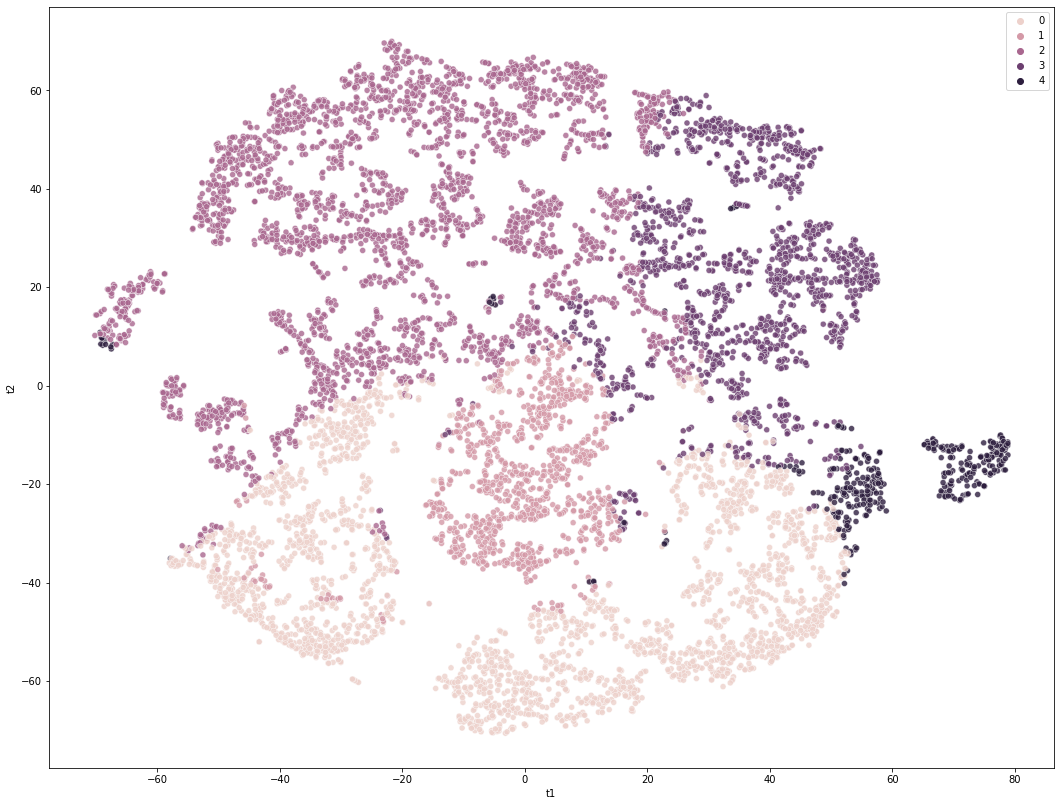

In [ ]:
# sets the figure size
plt.figure(figsize=(18,14))

# plots a scatter plot
sns.scatterplot(data=df_tsne, x='t1', y='t2', hue='labels', alpha=0.8)

# displays the legend
plt.legend()

# displays the plot
plt.show()

In [ ]:

# instantiates TSNE
model = TSNE(n_components=3, perplexity=45, random_state=SEED, n_jobs=-1)

# fits TSNE to data
df_embedded = model.fit_transform(df_cc_normalized)

# joins transformation with labels
df_tsne = pd.concat([pd.DataFrame(df_embedded), pd.DataFrame(labels)], axis=1)

# renames columns
df_tsne.columns = ['t1','t2', 't3', 'labels']

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [ ]:
# plots a 3D plot for better cluster viz
fig = px.scatter_3d(df_tsne, x='t1', y='t2', z='t3',
              color='labels', opacity=0.5)

# displays the plot
fig.show()

In [ ]:
# gets the centroids
centroids = kmeans.cluster_centers_
print(centroids)

[[6.93820976e-02 2.30347874e-04 1.21464449e-01 4.81937406e-02
  7.33729050e-02 2.37494106e-02 1.71416761e-04 3.36237185e-05
  1.38960986e-04 7.60873100e-06 1.20191595e-04 2.85173270e-03
  9.41661318e-01 1.54678272e-01 6.48168141e-02 7.66497825e-05
  3.52361977e-03]
 [5.04048612e-01 2.71914024e-04 6.23254657e-02 3.66396862e-02
  2.57074108e-02 2.51302378e-01 6.79644667e-05 2.61251234e-05
  4.52092793e-05 5.70011906e-05 1.14906019e-03 1.33980338e-03
  7.17976904e-01 1.66389177e-01 1.84433683e-01 5.50220992e-07
  3.22212813e-03]
 [1.61390783e-01 2.45593679e-04 4.38799165e-01 2.57568951e-01
  1.81399270e-01 2.65257476e-02 2.03406799e-04 8.92173024e-05
  1.49583348e-04 9.47862948e-06 1.72268529e-04 6.17658770e-03
  6.02239798e-01 4.02797114e-01 8.70448985e-02 7.19368187e-05
  3.05973749e-03]
 [2.35885738e-01 2.16347854e-04 6.01132133e-02 3.40379010e-02
  2.60805221e-02 4.00502262e-01 5.27331950e-05 2.05024468e-05
  3.53106613e-05 6.54466096e-05 1.57140866e-03 1.12309068e-03
  5.35257289e-01

In [ ]:
# printing a sample of centroids
print(centroids[:, 0])
print(centroids[:, 1])
print(centroids[:, 2])

[0.0693821  0.50404861 0.16139078 0.23588574 0.30548527]
[0.00023035 0.00027191 0.00024559 0.00021635 0.00026209]
[0.12146445 0.06232547 0.43879916 0.06011321 0.15366776]


In [ ]:
# gets the max number of attributes
max_att = len(centroids[0])
feature_name = []
centroid_var = []

# calculates the variance for each feature centroid
for i in range(max_att):
    feature_name.append(df_cc.columns.values[i])
    centroid_var.append(centroids[:, i].var())

# creates a DataFrame for better visualization
df_feat_cent_vars = pd.DataFrame({'feature_name': feature_name, 'centroid_var':centroid_var})
df_feat_cent_vars.sort_values(by='centroid_var', ascending=False)

,feature_name,centroid_var
14,minimum_payments,5.518958e-02
12,credit_limit,3.470238e-02
13,payments,2.809151e-02
5,cash_advance,2.254945e-02
0,balance,2.163115e-02
2,purchases,1.970144e-02
3,oneoff_purchases,7.770158e-03
4,installments_purchases,3.560743e-03
11,purchases_trx,3.411595e-06
10,cash_advance_trx,3.293613e-07


In [ ]:
# get the values for each col grouped by cluster
description = df_cc.groupby('cluster')[['balance', 'purchases', 'cash_advance','credit_limit',
                                        'payments', 'minimum_payments']]


# calculates the number of customers in each cluster
n_customers = description.size()

# calculates the mean for each value in each cluster
description = description.mean()

description['n_customers'] = n_customers

# displays the summary
description

,balance,purchases,cash_advance,credit_limit,payments,minimum_payments,n_customers
cluster,,,,,,,
0,446.252889,633.366372,142.811165,5162.048825,821.709255,261.531405,3261
1,3033.858533,388.375150,1626.233904,4482.819549,966.742546,1039.375630,2660
2,1149.895658,3280.955489,188.325854,4098.050946,3047.408310,550.960186,1534
3,1802.737090,472.374781,3275.439534,3991.026293,4710.631738,743.302516,1073
4,1844.735791,806.525498,393.290487,2129.857820,1258.948394,5863.315022,422


In [ ]:
# check the clusters
description

,balance,purchases,cash_advance,credit_limit,payments,minimum_payments,n_customers
cluster,,,,,,,
0,446.252889,633.366372,142.811165,5162.048825,821.709255,261.531405,3261
1,3033.858533,388.375150,1626.233904,4482.819549,966.742546,1039.375630,2660
2,1149.895658,3280.955489,188.325854,4098.050946,3047.408310,550.960186,1534
3,1802.737090,472.374781,3275.439534,3991.026293,4710.631738,743.302516,1073
4,1844.735791,806.525498,393.290487,2129.857820,1258.948394,5863.315022,422


In [ ]:
# percentage of credit card invoice that a customer paid
df_cc.groupby('cluster')['prc_full_payment'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,3261.0,0.248489,0.347201,0.0,0.0,0.000000,0.454545,1.0
1,2660.0,0.001792,0.023212,0.0,0.0,0.000000,0.000000,0.6
2,1534.0,0.278310,0.367283,0.0,0.0,0.083333,0.545455,1.0
3,1073.0,0.117233,0.186840,0.0,0.0,0.083333,0.142857,1.0
4,422.0,0.018815,0.089758,0.0,0.0,0.000000,0.000000,1.0
